# BUSINESS UNDERSTANDING

This project analyzes customer transactional data from an eCommerce platform to uncover behavioral insights and patterns. It showcases practical data analytics skills including cleaning, exploration, behavioral analysis, and visualization.
 📊 Objectives

- Understand customer purchase behavior
- Analyze trends in product sales, returns, and churn
- Segment customers for targeted marketing
- Demonstrate skills in pandas, matplotlib/seaborn, and storytelling with data

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("NumPy:", np.__version__)

NumPy: 1.18.5


Data Understanding and Data Cleaning

In [2]:
# Load the dataset
df = pd.read_csv('C:/Users/USER/OneDrive/Desktop/Data science/Data Analyst Applications/ecommerce_customer_large_data.csv')  

# Quick overview
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


In [5]:
# checking for duplicated rows

print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [6]:
# Checking for missing values
df.isnull().sum().sort_values(ascending=False)


Returns                  47382
Churn                        0
Gender                       0
Age                          0
Customer Name                0
Customer Age                 0
Payment Method               0
Total Purchase Amount        0
Quantity                     0
Product Price                0
Product Category             0
Purchase Date                0
Customer ID                  0
dtype: int64

In [7]:
# Check unique values in Returns
df['Returns'].value_counts(dropna=False)

1.0    101476
0.0    101142
NaN     47382
Name: Returns, dtype: int64

In [8]:
# Fill missing returns as 0 and convert to integer
df['Returns'] = df['Returns'].fillna(0).astype(int)

In [9]:
# Convert Purchase Date to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Drop duplicate Age column if it's identical
df = df.drop(columns=['Age'])  # We keep 'Customer Age' instead

In [10]:
# Summary statistics
df.describe()

# Info again after changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Customer Age           250000 non-null  int64         
 8   Returns                250000 non-null  int32         
 9   Customer Name          250000 non-null  object        
 10  Gender                 250000 non-null  object        
 11  Churn                  250000 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(6), ob

EXPLORATORY DATA ANALYSIS

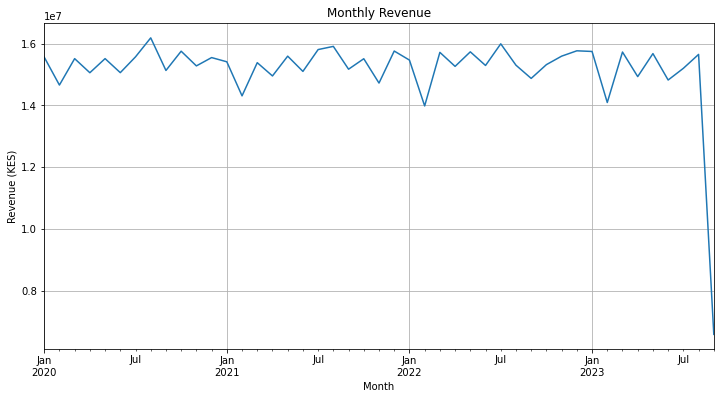

In [11]:
# Purchases over time
df.set_index('Purchase Date')['Total Purchase Amount'].resample('M').sum().plot(figsize=(12,6), title='Monthly Revenue')
plt.ylabel('Revenue (KES)')
plt.xlabel('Month')
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Preferred Payment Methods')

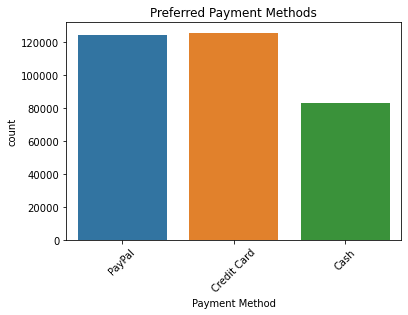

In [12]:
## Distribution Analysis
# Age distribution
sns.histplot(df['Customer Age'], bins=30, kde=True)
plt.title("Customer Age Distribution")

# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")

# Payment method
sns.countplot(x='Payment Method', data=df)
plt.xticks(rotation=45)
plt.title("Preferred Payment Methods")


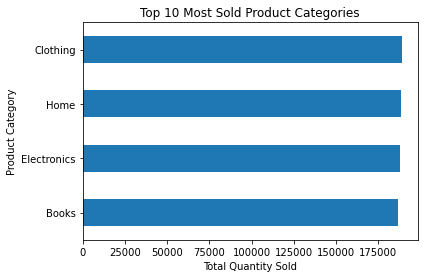

In [13]:
# Product Category Insight
# Most sold product categories
top_categories = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).head(10)
top_categories.plot(kind='barh', title='Top 10 Most Sold Product Categories')
plt.xlabel("Total Quantity Sold")
plt.gca().invert_yaxis()

Text(0, 0.5, 'Total Revenue (KES)')

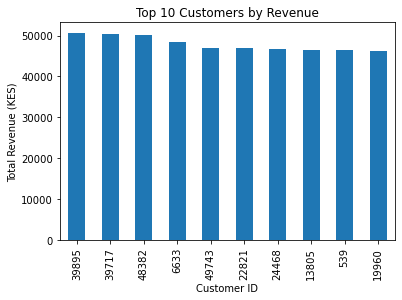

In [14]:
# Revenue by customer
top_customers = df.groupby('Customer ID')['Total Purchase Amount'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Revenue')
plt.ylabel("Total Revenue (KES)")


Percentage of orders with returns recorded: 100.00%


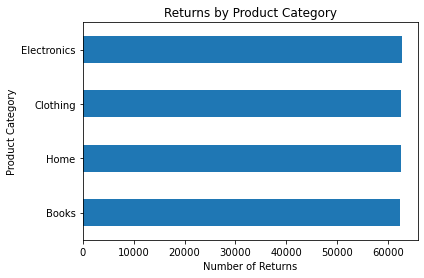

In [15]:
# Return Analysis
# Percentage of returns
returned = df['Returns'].notnull().mean() * 100
print(f"Percentage of orders with returns recorded: {returned:.2f}%")

# Return trends by category
returns_by_category = df[df['Returns'].notnull()].groupby('Product Category')['Returns'].count().sort_values(ascending=False)
returns_by_category.head(10).plot(kind='barh', title='Returns by Product Category')
plt.xlabel("Number of Returns")
plt.gca().invert_yaxis()


([<matplotlib.axis.XTick at 0x1d2f14ea5b0>,
 [Text(0, 0, 'Active'), Text(1, 0, 'Churned')])

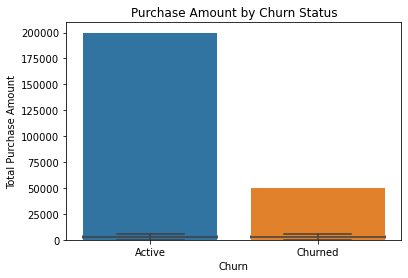

In [16]:
#Churn vs Non-Churn Customer Behavior
# Count of churned customers
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.xticks([0, 1], ['Active', 'Churned'])

# Revenue comparison
sns.boxplot(x='Churn', y='Total Purchase Amount', data=df)
plt.title("Purchase Amount by Churn Status")
plt.xticks([0, 1], ['Active', 'Churned'])


In [1]:
# Avg return rate by product category
df.groupby('Product Category')['Returns'].mean().sort_values(ascending=False).plot(kind='barh', figsize=(10, 5), color='coral')
plt.title("Average Return Rate by Product Category")
plt.xlabel("Average Return Rate")
plt.ylabel("Product Category")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined